<a href="https://colab.research.google.com/github/raulanegro/Chouse/blob/TP-Final/Notebook_Final_Raul_Negro_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<titulo> Ausentismo Laboral

<big> Información Obtenida

<small>

https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

<big>Objetivo
<small>

Predecir el tiempo de ausencia en un lugar de trabajo.

<big>Información de Atributos

<small>


1. Identificación individual (ID)

2. Razón de ausencia (CIE). Ausencias certificadas por el Código Internacional de Enfermedades (CIE), estratificadas en 21 categorías (I a XXI) de la siguiente manera:

I Enfermedades infecciosas y parasitarias
II Neoplasias
III Enfermedades de la sangre y de los órganos hematopoyéticos, así como ciertos trastornos que afectan al mecanismo inmunológico
IV Enfermedades endocrinas, nutricionales y metabólicas
V Trastornos mentales y del comportamiento
VI Enfermedades del sistema nervioso
VII Enfermedades de los ojos y anexos
VIII Enfermedades del oído y apófisis mastoides
IX Enfermedades del sistema circulatorio
X Enfermedades del sistema respiratorio
XI Enfermedades del sistema digestivo
XII Enfermedades de la piel y del tejido subcutáneo
XIII Enfermedades del sistema musculoesquelético y del tejido conectivo
XIV Enfermedades del sistema genitourinario
XV Embarazo, parto y puerperio
XVI Ciertas condiciones originadas en el período perinatal
XVII Malformaciones congénitas, deformidades y anomalías cromosómicas
XVIII Síntomas, signos y hallazgos clínicos y de laboratorio anormales, no clasificados en otra parte
XIX Lesiones, intoxicaciones y otras consecuencias de causas externas
XX Causas externas de morbilidad y mortalidad
XXI Factores que influyen en el estado de salud y contacto con los servicios de salud.

Y 7 categorías sin seguimiento del paciente (CIE), consulta médica (23), donación de sangre (24), examen de laboratorio (25), ausencia injustificada (26), fisioterapia (27), consulta dental (28).

3. Mes de la ausencia
4. Día de la semana (lunes (2), martes (3), miércoles (4), jueves (5), viernes (6))
5. Estaciones del año (verano (1), otoño (2), invierno (3), primavera (4))
6. Gasto de transporte
7. Distancia desde el domicilio hasta el lugar de trabajo (kilómetros)
8. Tiempo de servicio
9. Edad
10. Carga de trabajo promedio por día
11. Objetivo de impacto
12. Fallo disciplinario (sí=1; no=0)
13. Educación (secundaria (1), graduado (2), posgrado (3), máster y doctorado (4))
14. Hijos (número de hijos)
15. Bebedor social (sí=1; no=0)
16. Fumador social (sí=1; no=0)
17. Mascotas (número de mascotas)
18. Peso
19. Altura
20. Índice de masa corporal
21. Tiempo de ausencia en horas (objetivo)

In [ ]:
pip install pandas



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Importaciones generales

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Ruta del archivo Excel
ruta_archivo = r'C:\Users\raula\OneDrive\Documentos\Programacion COCO\Data Science\DataScience\Base de datos\Clase 42\Absenteeism_at_work.xls'

#Cargar el archivo Excel en un DataFrame
df = pd.read_excel(ruta_archivo)

df['Son'] = df['Son'].apply(lambda x: 1 if x > 0 else x)

#Mostrar el DataFrame
print(df)


     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
0                    

In [ ]:
#Generar 4000 registros aleatorios
registros_aleatorios = df.sample(n=4000, replace=True)

#Concatenar los registros aleatorios al DataFrame original
df_extendido = pd.concat([df, registros_aleatorios], ignore_index=True)

#Imprimir las dimensiones del DataFrame extendido
print("Dimensiones del DataFrame extendido:", df_extendido.shape)

#Imprimir las primeras filas del DataFrame extendido
print(df_extendido.head())

df=df_extendido


Dimensiones del DataFrame extendido: (4740, 21)
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day  

In [ ]:
df['Month of absence'] = df['Month of absence'].replace(0, 6)
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,...,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.000000,4740.00000,4740.000000,4740.000000,4740.000000
mean,18.127215,19.085865,6.325527,3.912447,2.548945,221.705485,29.613502,12.610338,36.593882,271982.897679,...,0.052110,1.284177,0.597679,0.573629,0.073629,0.729958,79.08038,172.209072,26.665612,6.792405
std,10.994448,8.513386,3.400430,1.423336,1.105115,67.070530,14.869765,4.343484,6.513142,39692.194546,...,0.222272,0.666982,0.490418,0.494601,0.261193,1.296053,12.80579,6.105457,4.238585,12.710102
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.00000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.00000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264604.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.00000,171.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,89.00000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,8.000000,108.00000,196.000000,38.000000,120.000000


In [ ]:
# Contar los valores nulos por columna
valores_nulos_por_columna = df.isnull().sum()

# Mostrar los valores nulos por columna
print(valores_nulos_por_columna)

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [ ]:
# Contar los valores nulos o en blanco por columna
valores_nulos_o_en_blanco_por_columna = df.applymap(lambda x: pd.isna(x) or (isinstance(x, str) and x.isspace())).sum()

# Mostrar los valores nulos o en blanco por columna
print(valores_nulos_o_en_blanco_por_columna)

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


C:\Users\raula\AppData\Local\Temp\ipykernel_17708\650526659.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valores_nulos_o_en_blanco_por_columna = df.applymap(lambda x: pd.isna(x) or (isinstance(x, str) and x.isspace())).sum()


In [ ]:
# Contar cuántas filas tienen un valor mayor que 0 en la columna 'Disciplinary failure'
contador_disciplinary_failure = (df['Disciplinary failure'] > 0).sum()

# Mostrar el resultado
print("Número de filas con 'Disciplinary failure' mayor a 0:", contador_disciplinary_failure)

Número de filas con 'Disciplinary failure' mayor a 0: 247


Consideraciones del DF
- Si fueron por un problema disciplinacion, la empresa fue la que decidio que no asista, por tal motivo, no podemos considerarlo dentro del analisis. Luego del filtrado, vamos a sacar la columna.
- No consideraremos el ID, ya que el objetivo es obtener las probabilidades de horas no trabajadas, sin importar que persona es. Vamos a sacar la columna.
- La columna Reason for Absence, vamos a borrarla, ya que no nos interesa saber cual fue la razon de su ausencia.
- No consideraremos Body Mass Index, ya que tiene una alta correlacion con Weight
- No consideraremos Service Time ya que tiene mucha correlacion con la edad
- Si son fumadores, porque no vemos sentido analizarlo
- Si son bebedores, porque no vemos sentido analizarlo
- Vemos que la estacionalidad no afecta, ya que es plano en todas las epocas.
- Vemos que la altura tiene que ver con la media de la sociedad.
. Si tiene animales tambien vamos a sacarlo de analisis


In [ ]:
# Vamos a filtrar los siguientes filas y columnas con los siguientes

# Filtrar las filas donde 'Disciplinary failure' es igual que 0
df_filtrado = df[df['Disciplinary failure'] == 0]

# Eliminar las columnas 'ID' y 'Reason for absence'
df_nuevo = df_filtrado.drop(['ID', 'Reason for absence', 'Disciplinary failure', 'Hit target', 'Body mass index', 'Service time', 'Social drinker', 'Social smoker', 'Seasons', 'Height','Work load Average/day ','Pet','Weight'], axis=1)


df_nuevo.shape

(4493, 8)

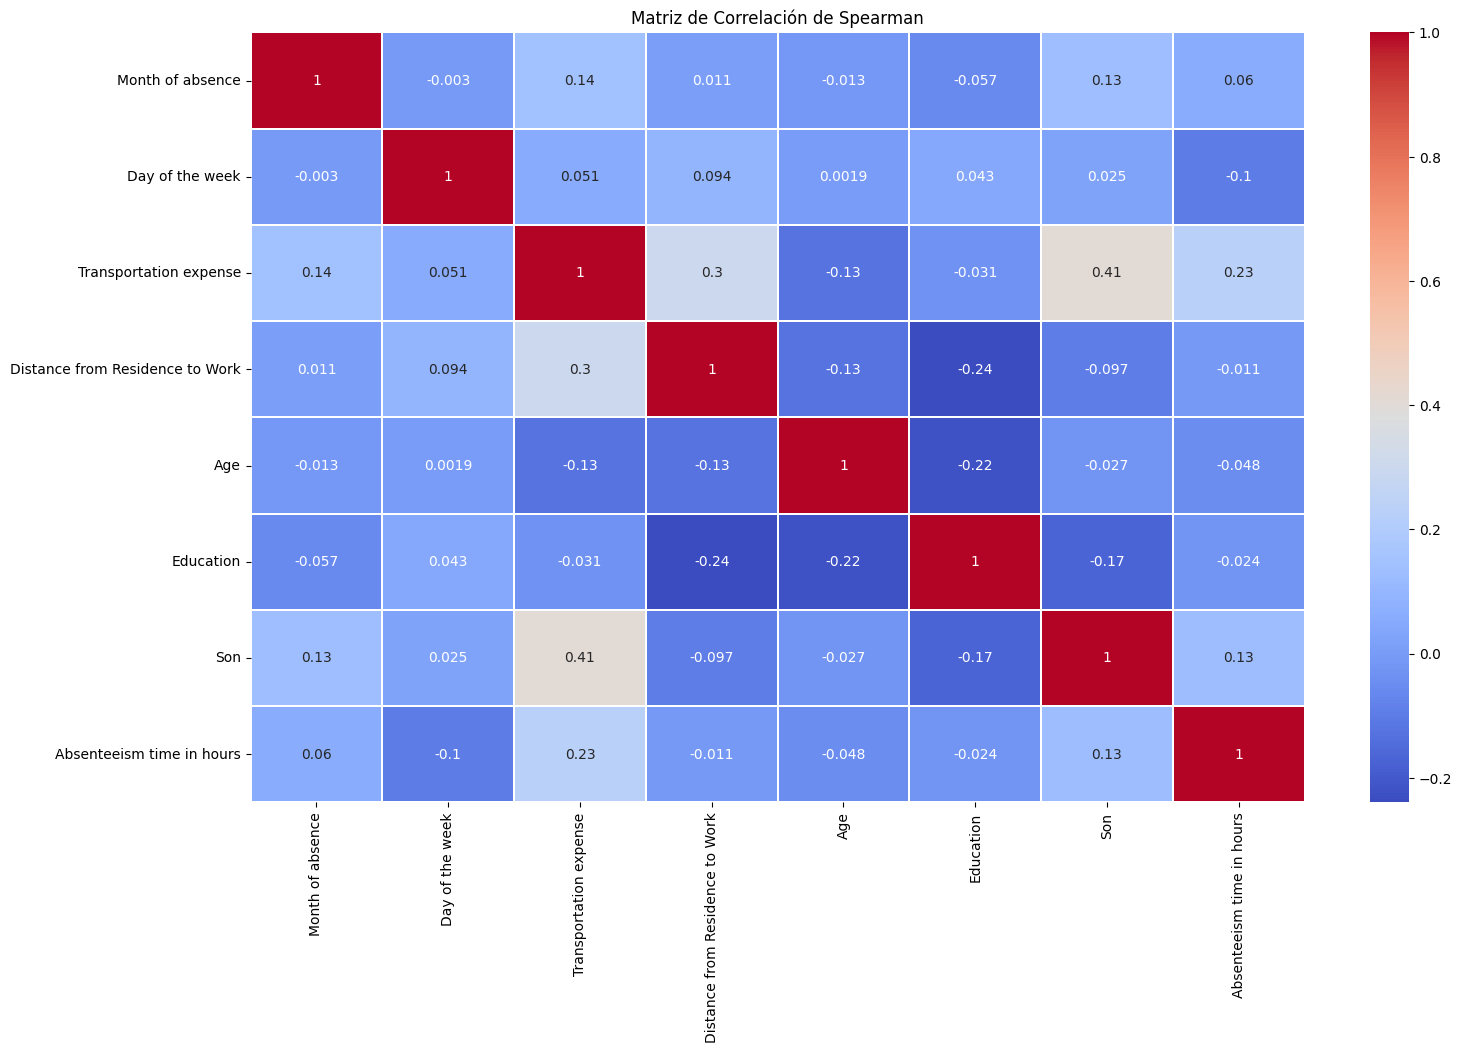

In [ ]:
# Se genera un mapa de calor para entender la correlacion
# Calcular la matriz de correlación de Spearman
correlation_matrix = df_nuevo.corr(method="spearman")

# Crear un mapa de calor
plt.figure(figsize=(17, 10))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.25)
plt.title('Matriz de Correlación de Spearman')
plt.show()

In [ ]:
pip install pandas seaborn matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

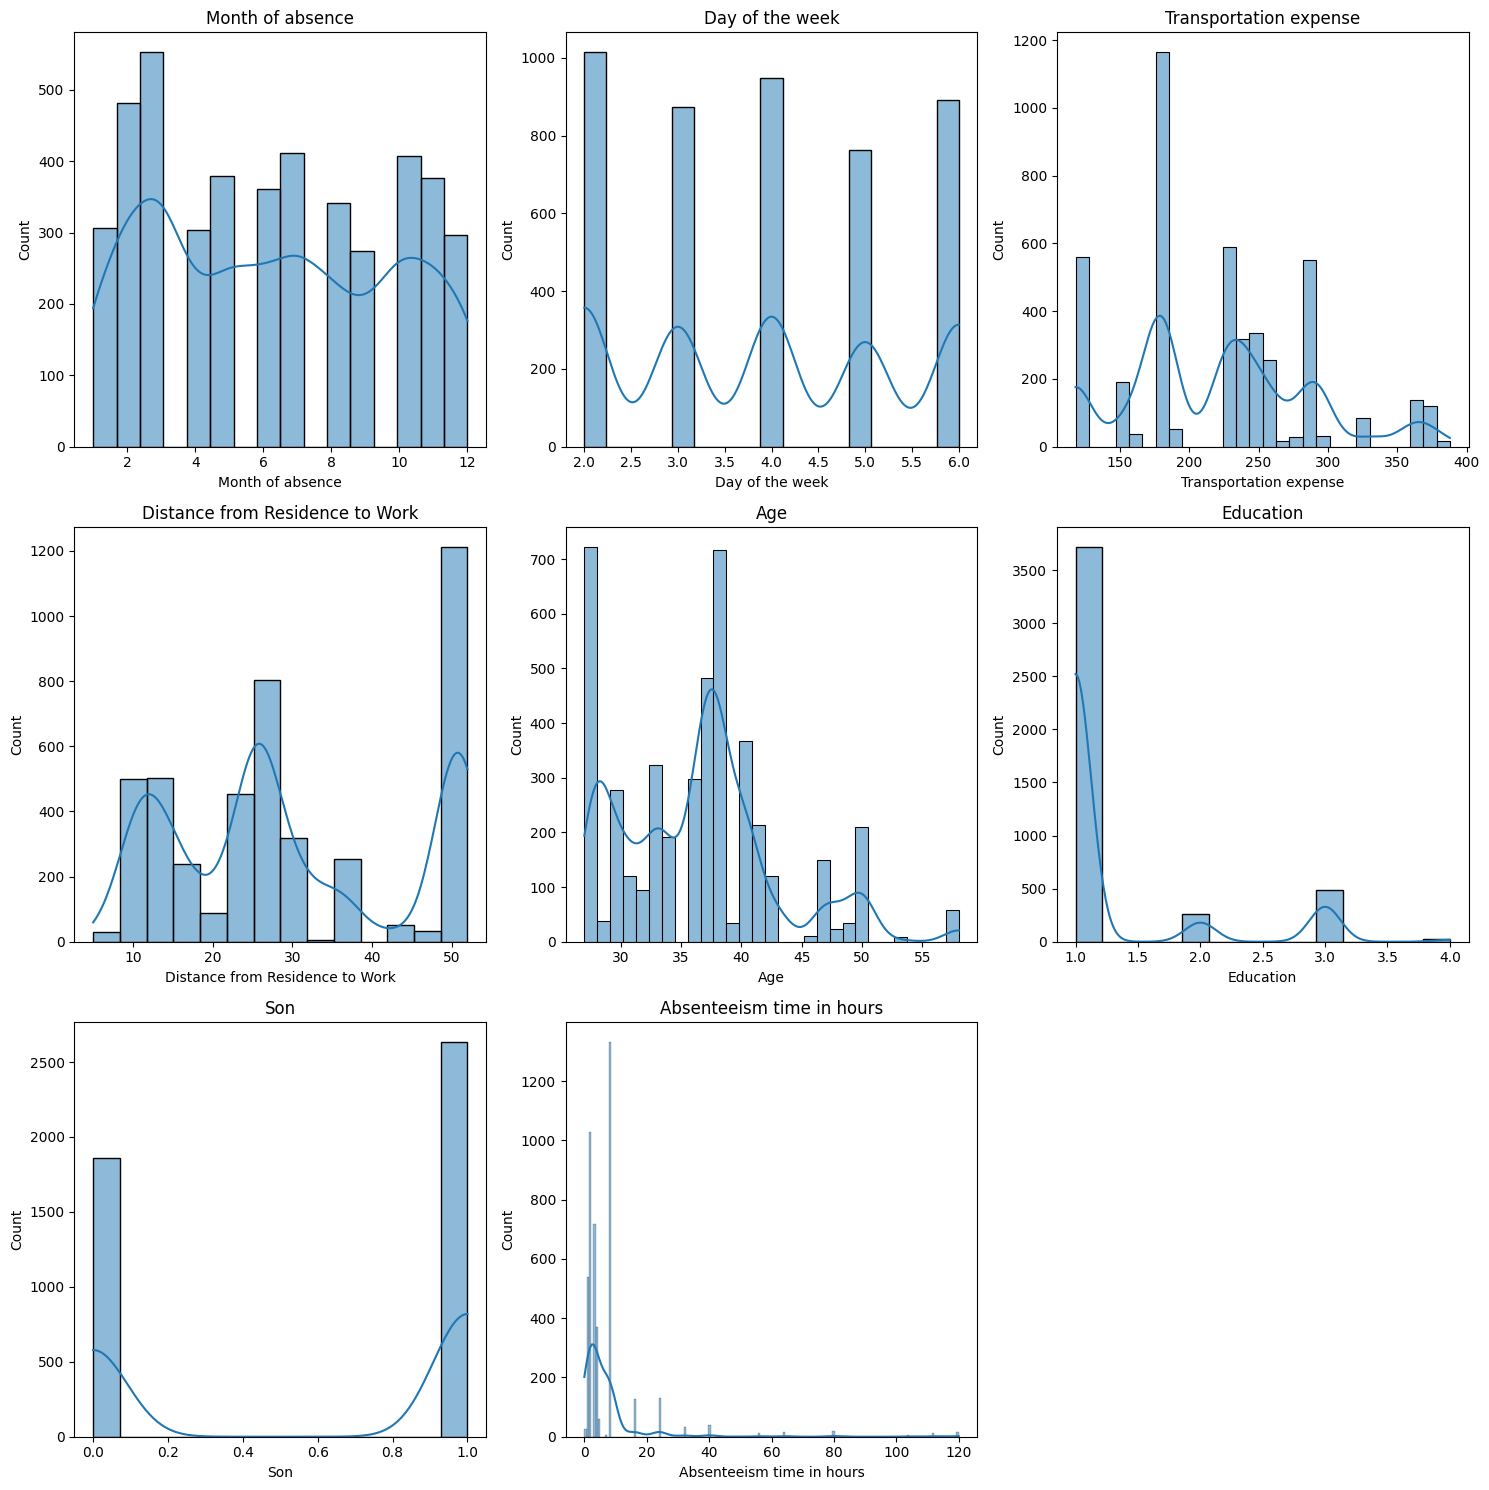

In [ ]:

# Definir el número de columnas para mostrar en cada fila
num_columnas_por_fila = 3

# Calcular el número total de subgráficos y filas
num_subgraficos = len(df_nuevo.columns)
num_filas = (num_subgraficos - 1) // num_columnas_por_fila + 1

# Configurar el tamaño del lienzo
plt.figure(figsize=(15, 5 * num_filas))

# Iterar sobre cada columna y crear un histograma
for i, columna in enumerate(df_nuevo.columns):
    plt.subplot(num_filas, num_columnas_por_fila, i + 1)
    sns.histplot(df_nuevo[columna], kde=True)
    plt.title(columna)

# Ajustar el diseño para evitar la superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

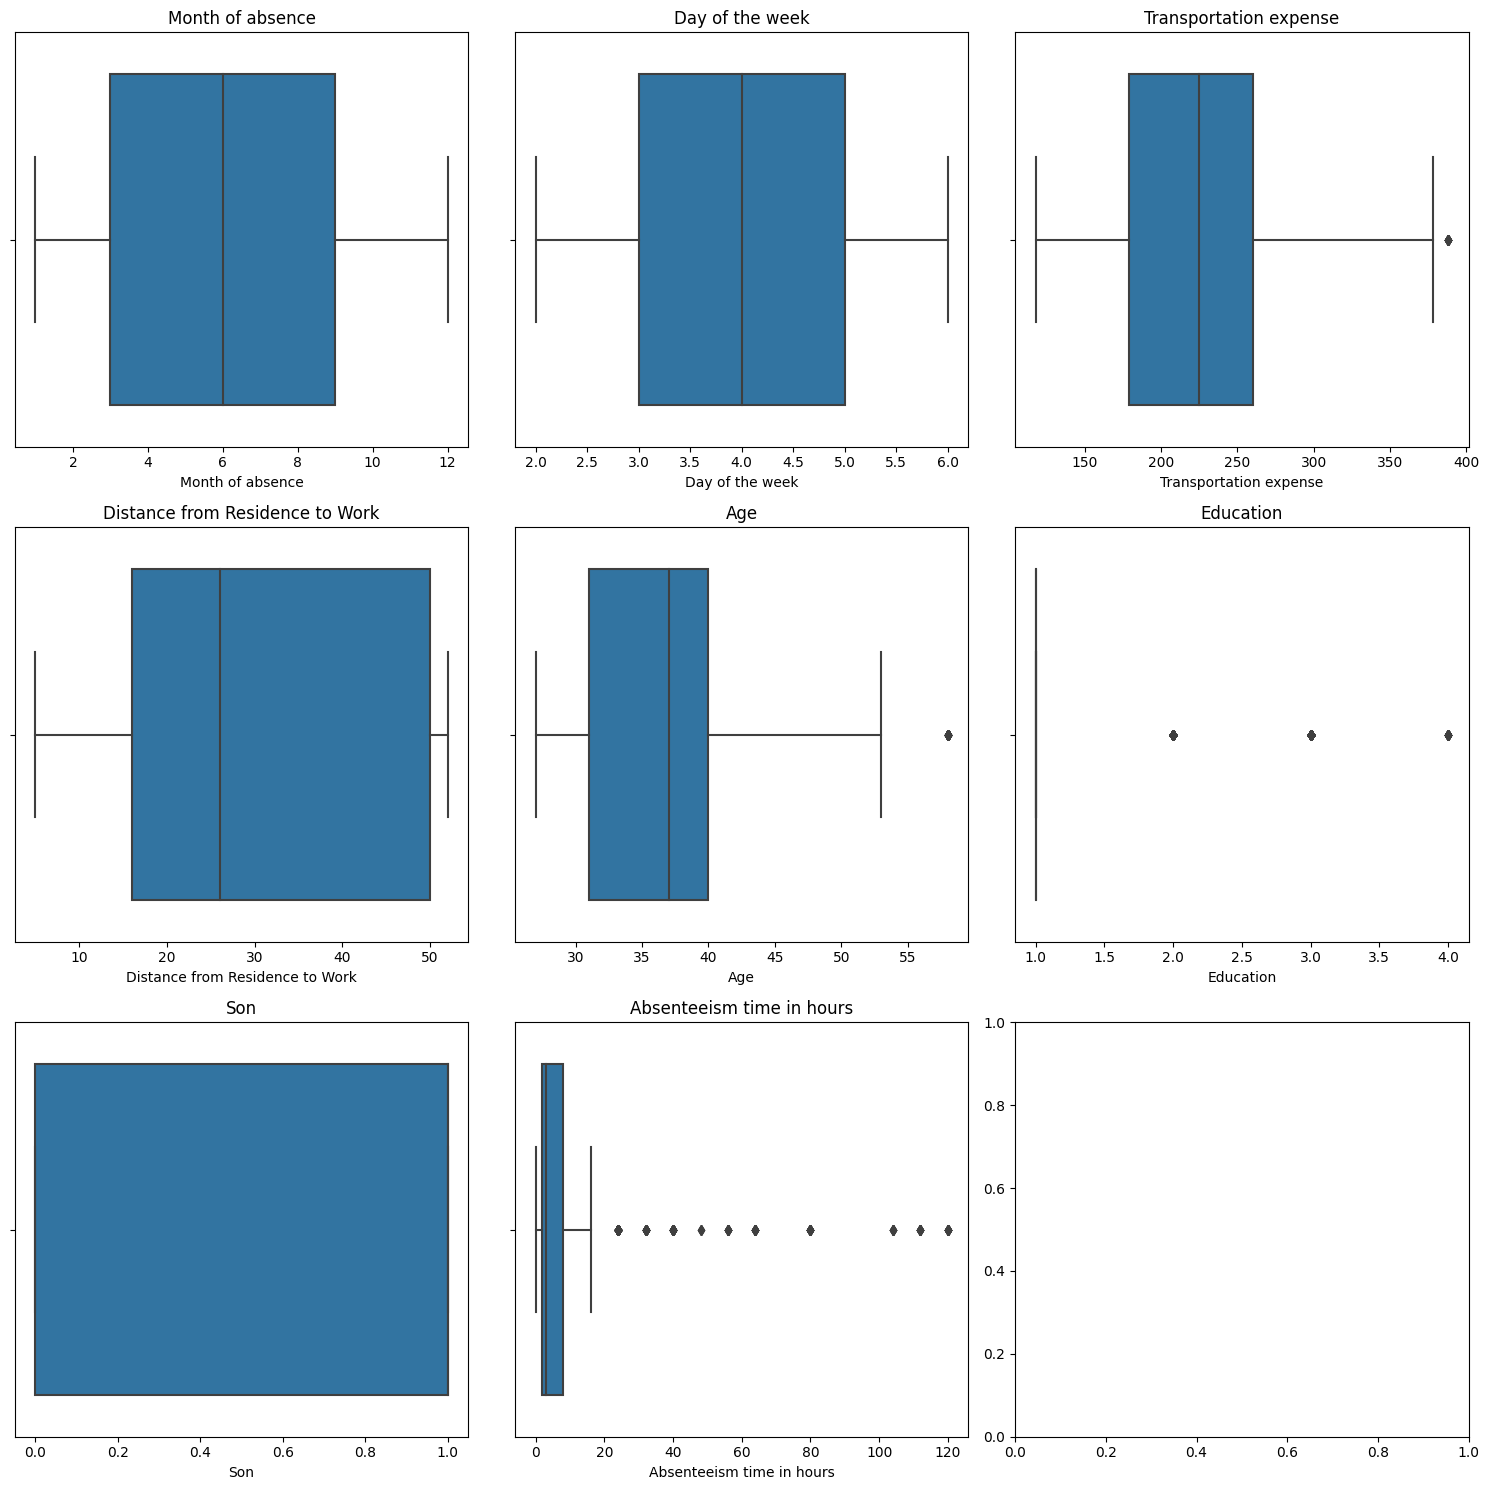

In [ ]:
# Definir el número de columnas para mostrar en cada fila
num_columnas_por_fila = 3

# Calcular el número total de subgráficos y filas
num_subgraficos = len(df_nuevo.columns)
num_filas = (num_subgraficos - 1) // num_columnas_por_fila + 1

# Configurar el tamaño del lienzo
fig, axes = plt.subplots(num_filas, num_columnas_por_fila, figsize=(15, 5 * num_filas))

# Aplanar el array de subgráficos si hay solo una fila
if num_filas == 1:
    axes = [axes]

# Iterar sobre cada columna y crear un boxplot
for i, columna in enumerate(df_nuevo.columns):
    sns.boxplot(x=df_nuevo[columna], ax=axes[i // num_columnas_por_fila, i % num_columnas_por_fila])
    axes[i // num_columnas_por_fila, i % num_columnas_por_fila].set_title(columna)

# Ajustar el diseño para evitar la superposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Crear las variables X_data e y_data
X_data = df_nuevo.drop('Absenteeism time in hours', axis=1)
y_data = df_nuevo['Absenteeism time in hours']

In [ ]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [ ]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [ ]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [20,30,50,100],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[3,4,5,6]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, # Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
107 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6], 'max_features': [2, 4, 5],
                         'n_estimators': [20, 30, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5)

In [ ]:
#random_forest_nuevo = RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5,n_estimators=50)

# Asignar el mejor estimador encontrado por la búsqueda de hiperparámetros a random_forest_nuevo
random_forest_nuevo = grid_random_forest.best_estimator_

# Imprimir el mejor estimador
print(random_forest_nuevo)


RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5)


In [ ]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5)

In [ ]:
X_train.shape

(3145, 7)

In [ ]:
#Predicción de casos nuevos
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([2.94 , 2.88 , 3.   , ..., 2.93 , 2.46 , 2.995])

In [ ]:
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Education,Son,Prediccion
1328,6,4,225,26,28,1,1,3.0
1151,12,4,225,26,28,1,1,3.0
778,3,4,179,51,38,1,0,3.0
2897,3,3,118,10,37,1,0,3.0
1964,2,6,179,51,38,1,0,2.0
...,...,...,...,...,...,...,...,...
1540,7,6,118,10,37,1,0,6.0
2310,3,5,179,51,38,1,0,3.0
829,10,3,225,26,28,1,1,3.0
3580,1,5,184,42,27,1,0,2.0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes X_data e y_data definidos
# Aquí estamos utilizando RandomForestRegressor como ejemplo de modelo
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Entrenar el modelo
random_forest_nuevo = RandomForestRegressor()
random_forest_nuevo.fit(X_train, y_train)

# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test1 = X_test.copy()
X_test1['Prediccion'] = np.round(random_forest_nuevo.predict(X_test), 0)

# Agregar la columna 'Real' con los valores reales
X_test1['Real'] = y_test.values

# Imprimir el DataFrame actualizado
X_test1


,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Age,Education,Son,Prediccion,Real
164,3,2,179,22,40,2,1,39.0,40
2657,12,5,235,11,37,3,1,2.0,2
1080,1,3,155,12,34,1,1,6.0,8
1186,3,4,228,14,58,1,1,2.0,2
773,7,4,225,26,28,1,1,11.0,8
...,...,...,...,...,...,...,...,...,...
3483,8,2,235,29,48,1,1,8.0,8
4450,10,3,291,31,40,1,1,6.0,8
4658,6,2,289,48,49,1,0,2.0,2
1899,4,5,189,29,33,1,1,8.0,8


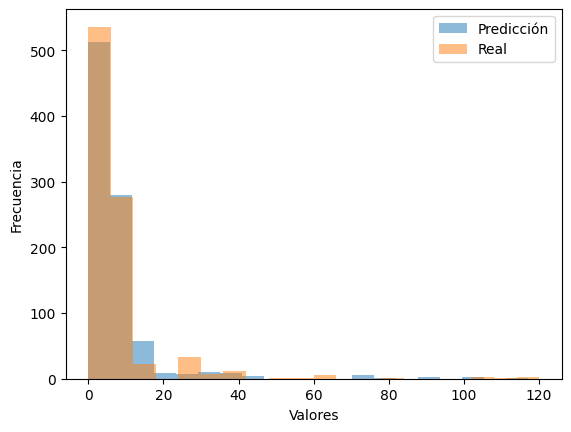

Desvío medio entre Predicción y Real: 2.307007786429366


In [ ]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'

# Crear un histograma que muestre tanto las predicciones como los valores reales
plt.hist(X_test1['Prediccion'], bins=20, alpha=0.5, label='Predicción')
plt.hist(X_test1['Real'], bins=20, alpha=0.5, label='Real')

# Añadir etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

# Calcular el desvío entre predicciones y valores reales
desvio = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
print(f"Desvío medio entre Predicción y Real: {desvio}")


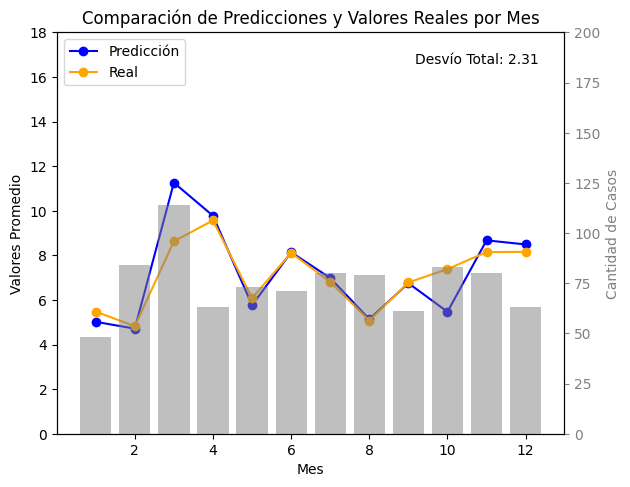

In [ ]:

# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()


In [ ]:
df_nuevo.describe

<bound method NDFrame.describe of       Month of absence  Day of the week  Transportation expense  \
0                    7                3                     289   
2                    7                4                     179   
3                    7                5                     279   
4                    7                5                     289   
5                    7                6                     179   
...                ...              ...                     ...   
4734                 3                3                     378   
4735                 6                2                     118   
4736                 1                3                     179   
4737                 6                2                     179   
4738                10                3                     225   

      Distance from Residence to Work  Age  Education  Son  \
0                                  36   33          1    1   
2                                  51

In [ ]:
# Supongamos que tienes un DataFrame llamado X_test1
# con las columnas 'Prediccion' y 'Absenteeism time in hours'

# Calcular la suma de las horas de predicción
total_prediccion = X_test1['Prediccion'].sum() if 'Prediccion' in X_test1.columns else 0

# Calcular la suma de las horas reales
total_real = X_test1['Real'].sum() if 'Real' in X_test1.columns else 0

# Imprimir los resultados
print(f'Total de horas de predicción: {total_prediccion}')
print(f'Total de horas reales: {total_real}')
desviacion_total = 100 - total_real / total_prediccion * 100

# Redondear a 1 dígito y formatear como porcentaje
desviacion_formateada = round(desviacion_total, 1)

# Imprimir la desviación total formateada
print(f'Desviación Total: {desviacion_formateada:.1f}%')


Total de horas de predicción: 6596.0
Total de horas reales: 6414
Desviación Total: 2.8%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 58.47567059470515
Mean Absolute Error: 2.323916346395431
R-squared: 0.5687929003864223


Calculo por Regresión

In [ ]:

# 1 )Preparación de datos
X = df_nuevo[['Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Education', 'Son']]
Y = df_nuevo['Absenteeism time in hours']


In [ ]:
# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 'Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Education', 'Son'
regressor.coef_

array([ 0.09170405, -1.0837278 ,  0.00634357, -0.07286692,  0.10232027,
       -1.00089232,  2.26205518])

In [ ]:
regressor.intercept_

7.859683542943026

In [ ]:
# Crear el DataFrame 'coeff_df' con los coeficientes del modelo
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'], index=['Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Education', 'Son'])

# Imprimir el DataFrame con los coeficientes
print(coeff_df)


                                 Coefficient
Month of absence                    0.091704
Day of the week                    -1.083728
Transportation expense              0.006344
Distance from Residence to Work    -0.072867
Age                                 0.102320
Education                          -1.000892
Son                                 2.262055


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 9.85284783,  7.2759236 ,  9.54910621, 11.42181962,  7.82559389,
        7.98671375, 12.24760767,  4.65721636,  6.82412803,  8.53790406,
        5.55753607,  5.35960079,  8.18351188,  4.96536641,  6.69641804,
       10.52710698,  8.91801426,  5.19017596,  5.8785411 ,  2.93101633,
        8.18351188,  2.66597486,  9.44482843, 10.47305449,  8.28411412,
        7.57589508,  7.96921098,  2.48921685, 11.78908744,  7.87184988,
        7.93234617, 10.31136805,  6.87982613,  6.7418661 ,  7.93234617,
        6.54901589,  3.75635273,  8.54801789,  5.37358405,  6.79377914,
        8.5137782 ,  7.82559389, 11.64204978,  6.73242398,  4.90143569,
        5.25333353,  2.96250062,  3.29118243,  6.93078657,  6.7418661 ,
        3.75635273,  8.18351188,  2.21410471,  7.6421858 ,  7.5050337 ,
       10.45708209,  3.92304008, 10.273674  ,  8.76912003, 11.64204978,
        3.02272037,  5.37358405,  8.02405021,  9.04728172,  7.20038632,
       11.60522771,  3.74970265, 11.45864169, 10.55785071, 12.50

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
164,40,9.852848,30.147152,75.367880
2657,2,7.275924,-5.275924,-263.796180
1080,8,9.549106,-1.549106,-19.363828
1186,2,11.421820,-9.421820,-471.090981
773,8,7.825594,0.174406,2.180076
...,...,...,...,...
3483,8,11.975994,-3.975994,-49.699924
4450,8,10.466618,-2.466618,-30.832724
4658,2,8.590932,-6.590932,-329.546603
1899,8,6.531386,1.468614,18.357673


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error:", mae)

print("R-squared:", r2)

Mean Squared Error: 55.97420828772629
Mean Absolute Error: 2.295713000750681
R-squared: 0.5687929003864223


In [ ]:
# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test2 = X_test.copy()

# Agregar la columna 'Real' con los valores reales
X_test2['Real'] = y_test.values

# Agregar la columna 'Prediccion' con las predicciones redondeadas del modelo de regresión lineal
X_test2['Prediccion'] = np.round(regressor.predict(X_test), 0)

# Imprimir el DataFrame actualizado
print(X_test2)


      Month of absence  Day of the week  Transportation expense  \
164                  3                2                     179   
2657                12                5                     235   
1080                 1                3                     155   
1186                 3                4                     228   
773                  7                4                     225   
...                ...              ...                     ...   
3483                 8                2                     235   
4450                10                3                     291   
4658                 6                2                     289   
1899                 4                5                     189   
1949                10                5                     291   

      Distance from Residence to Work  Age  Education  Son  Real  Prediccion  
164                                22   40          2    1    40        10.0  
2657                               11

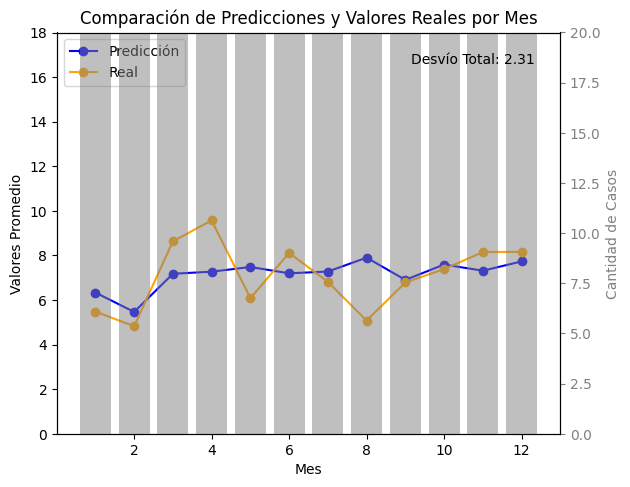

In [ ]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test2['Month of absence'] = pd.to_datetime(X_test2['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test2['Mes'] = X_test2['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test2.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test2.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test2.groupby('Mes')['Mes'].count().index, X_test2.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 20)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()


Modelo LGBM

In [ ]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que X es tu matriz de características y y es tu variable objetivo
X = df_nuevo.drop(columns=['Absenteeism time in hours'])
y = df_nuevo['Absenteeism time in hours']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo LightGBM
model = lgb.LGBMRegressor()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)


# Genera el informe de evaluación
print("\nEvaluation Report:")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 3594, number of used features: 7
[LightGBM] [Info] Start training from score 7.173623
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999

Evaluation Report:
Mean Squared Error: 69.03626594948783
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999


<big>Regresión con SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Suponiendo que X es tu matriz de características y y es tu variable objetivo
X = df_nuevo.drop(columns=['Absenteeism time in hours'])
y = df_nuevo['Absenteeism time in hours']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo SVM de regresión
model = SVR()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo (por ejemplo, MSE en el conjunto de prueba)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 147.54830146470442
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999


<big> Comparación de Resultado Normales Vs Extensión a 4000:


Resultado con 740 datos:
<small>

RandonForest
Mean Squared Error: 216.2453045679695
Mean Absolute Error: 6.678493136228852
R-squared: -0.2983644196896944


Calculo por Regresion-
Mean Squared Error: 157.57629114026162
Mean Absolute Error: 5.712765597349753
R-squared: -0.2983644196896944


Modelo LGBMR

Mean Squared Error: 205.72524611208834
Mean Absolute Error: 6.989051573157004
R-squared: -0.2983644196896944


Regresión con SVM
Mean Squared Error: 171.92301273045373
Mean Absolute Error: 6.989051573157004
R-squared: -0.2983644196896944

<small>


<big> Resultado del analisis con 740 datos originales se generan 4000 datos adicionales Random


<small>


Estos lo elige el notebook y mejoro notablemente los valores.


RandonForest
Mean Squared Error: 62.791566760975286
Mean Absolute Error: 2.550052136207802
R-squared: 0.5008048728786134

Calculo por Regresion-
Mean Squared Error: 61.286296208469686
Mean Absolute Error: 2.534507626290532
R-squared: 0.5008048728786134


Modelo LGBMR
Mean Squared Error: 68.30047352143673
Mean Absolute Error: 3.862476929723694
R-squared: 0.45700887363150533


Regresión con SVM
Mean Squared Error: 137.56012746977262
Mean Absolute Error: 3.862476929723694
R-squared: 0.45700887363150533

<small>

<big> Replanteo del problema del analisis.

<small>

Vamos a generar un nuevo modelo considerando todos los valores, salvo el ID, que falte por un tema disiplinario y el target.

In [ ]:


df_nuevo_1 = df_nuevo

# Suponiendo que ya tienes un DataFrame llamado df_nuevo_1
#df_nuevo_1 = df_filtrado.drop(['Age','Transportation expense','Distance from Residence to Work','ID', 'Reason for absence', 'Disciplinary failure', 'Hit target', 'Body mass index', 'Service time', 'Social drinker', 'Social smoker', 'Seasons', 'Height','Work load Average/day ','Pet','Weight'], axis=1)

df_nuevo_1 = df_filtrado.drop(['ID', 'Disciplinary failure', 'Hit target'], axis=1)


df_nuevo_1.shape
# Imprimir el nuevo DataFrame
#print(df_nuevo_1)


(4493, 18)

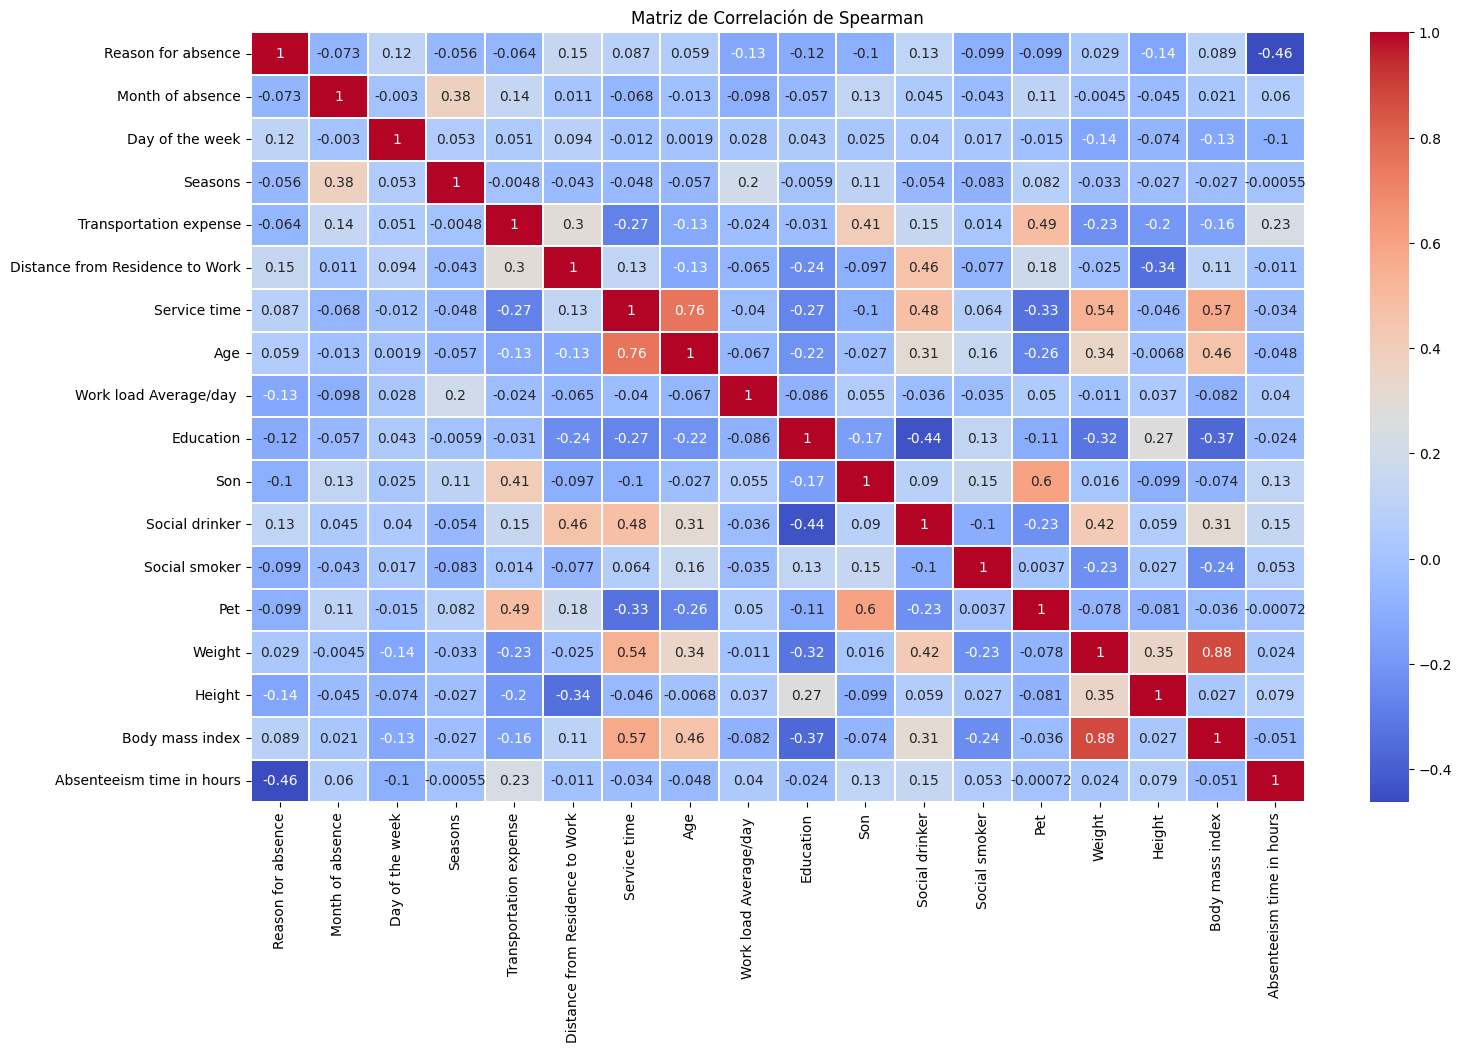

In [ ]:
# Se genera un mapa de calor para entender la correlacion

# Calcular la matriz de correlación de Spearman
correlation_matrix = df_nuevo_1.corr(method="spearman")

# Crear un mapa de calor
plt.figure(figsize=(17, 10))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.25)
plt.title('Matriz de Correlación de Spearman')
plt.show()

In [ ]:
# Crear las variables X_data e y_data
X_data = df_nuevo_1.drop('Absenteeism time in hours', axis=1)
y_data = df_nuevo_1['Absenteeism time in hours']

In [ ]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [ ]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [ ]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [20,30,50,100],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[3,4,5,6]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, # Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [ ]:
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 4, 5, 6], 'max_features': [2, 4, 5],
                         'n_estimators': [20, 30, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
#random_forest_nuevo = RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5,n_estimators=50)

# Asignar el mejor estimador encontrado por la búsqueda de hiperparámetros a random_forest_nuevo
random_forest_nuevo = grid_random_forest.best_estimator_

# Imprimir el mejor estimador
print(random_forest_nuevo)

RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=5)


In [ ]:
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Prediccion
2047,23,2,4,2,225,26,9,28,302585,1,1,0,0,2,69,169,24,2.0
1133,22,12,4,4,361,52,3,28,261306,1,1,1,0,4,80,172,27,8.0
3752,28,8,4,1,157,27,6,29,205917,1,0,1,1,0,75,185,22,3.0
3569,28,7,3,1,246,25,16,41,230290,1,0,1,0,0,67,170,23,3.0
4529,23,9,3,4,369,17,12,31,261756,1,1,1,0,0,70,169,25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,22,5,4,3,291,31,12,40,237656,1,1,1,0,1,73,171,25,9.0
2037,28,2,2,2,225,26,9,28,302585,1,1,0,0,2,69,169,24,2.0
1394,13,11,6,4,246,25,16,41,284031,1,0,1,0,0,67,170,23,8.0
4573,28,6,3,3,246,25,16,41,253957,1,0,1,0,0,67,170,23,3.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Supongamos que tienes X_data e y_data definidos
# Aquí estamos utilizando RandomForestRegressor como ejemplo de modelo
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Entrenar el modelo
random_forest_nuevo = RandomForestRegressor()
random_forest_nuevo.fit(X_train, y_train)

# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test1 = X_test.copy()
X_test1['Prediccion'] = np.round(random_forest_nuevo.predict(X_test), 0)

# Agregar la columna 'Real' con los valores reales
X_test1['Real'] = y_test.values

# Imprimir el DataFrame actualizado
X_test1

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Prediccion,Real
164,11,3,2,2,179,22,17,40,343253,2,1,0,1,0,63,170,22,38.0,40
2657,25,12,5,4,235,11,14,37,236629,3,1,0,0,1,88,172,29,2.0,2
1080,18,1,3,2,155,12,14,34,308593,1,1,1,0,0,95,196,25,8.0,8
1186,25,3,4,2,228,14,16,58,222196,1,1,0,0,1,65,172,22,2.0,2
773,22,7,4,1,225,26,9,28,264604,1,1,0,0,2,69,169,24,8.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,18,8,2,1,235,29,12,48,205917,1,1,0,1,5,88,163,33,8.0,8
4450,14,10,3,4,291,31,12,40,253465,1,1,1,0,1,73,171,25,9.0,8
4658,28,6,2,1,289,48,29,49,377550,1,0,0,0,2,108,172,36,2.0,2
1899,13,4,5,3,189,29,13,33,246288,1,1,0,0,2,69,167,25,8.0,8


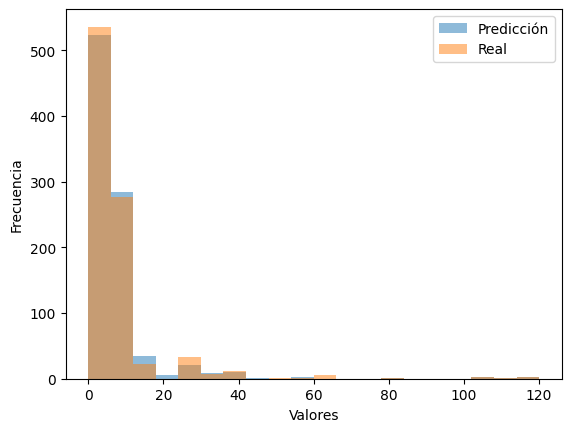

Desvío medio entre Predicción y Real: 0.560622914349277


In [ ]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'

# Crear un histograma que muestre tanto las predicciones como los valores reales
plt.hist(X_test1['Prediccion'], bins=20, alpha=0.5, label='Predicción')
plt.hist(X_test1['Real'], bins=20, alpha=0.5, label='Real')

# Añadir etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

# Calcular el desvío entre predicciones y valores reales
desvio = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
print(f"Desvío medio entre Predicción y Real: {desvio}")

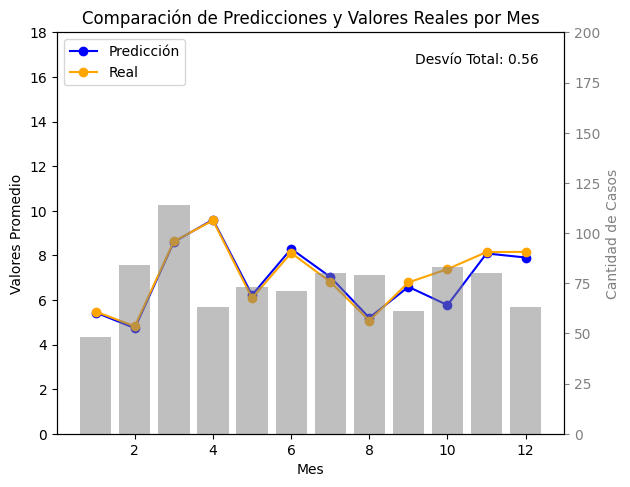

In [ ]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test1['Month of absence'] = pd.to_datetime(X_test1['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test1['Mes'] = X_test1['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test1.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test1.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test1.groupby('Mes')['Mes'].count().index, X_test1.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 10.915571617569936
Mean Absolute Error: 0.5990825311775603
R-squared: 0.9195071740098554


Calculo por Regresión

In [ ]:

# 1 )Preparación de datos
X = df_nuevo_1[['Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Education', 'Son']]
Y = df_nuevo_1['Absenteeism time in hours']


In [ ]:
# 2) Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

7.859683542943026

In [ ]:
# Crear el DataFrame 'coeff_df' con los coeficientes del modelo
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'], index=['Month of absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Age', 'Education', 'Son'])

# Imprimir el DataFrame con los coeficientes
print(coeff_df)


                                 Coefficient
Month of absence                    0.091704
Day of the week                    -1.083728
Transportation expense              0.006344
Distance from Residence to Work    -0.072867
Age                                 0.102320
Education                          -1.000892
Son                                 2.262055


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 9.85284783,  7.2759236 ,  9.54910621, 11.42181962,  7.82559389,
        7.98671375, 12.24760767,  4.65721636,  6.82412803,  8.53790406,
        5.55753607,  5.35960079,  8.18351188,  4.96536641,  6.69641804,
       10.52710698,  8.91801426,  5.19017596,  5.8785411 ,  2.93101633,
        8.18351188,  2.66597486,  9.44482843, 10.47305449,  8.28411412,
        7.57589508,  7.96921098,  2.48921685, 11.78908744,  7.87184988,
        7.93234617, 10.31136805,  6.87982613,  6.7418661 ,  7.93234617,
        6.54901589,  3.75635273,  8.54801789,  5.37358405,  6.79377914,
        8.5137782 ,  7.82559389, 11.64204978,  6.73242398,  4.90143569,
        5.25333353,  2.96250062,  3.29118243,  6.93078657,  6.7418661 ,
        3.75635273,  8.18351188,  2.21410471,  7.6421858 ,  7.5050337 ,
       10.45708209,  3.92304008, 10.273674  ,  8.76912003, 11.64204978,
        3.02272037,  5.37358405,  8.02405021,  9.04728172,  7.20038632,
       11.60522771,  3.74970265, 11.45864169, 10.55785071, 12.50

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
164,40,9.852848,30.147152,75.367880
2657,2,7.275924,-5.275924,-263.796180
1080,8,9.549106,-1.549106,-19.363828
1186,2,11.421820,-9.421820,-471.090981
773,8,7.825594,0.174406,2.180076
...,...,...,...,...
3483,8,11.975994,-3.975994,-49.699924
4450,8,10.466618,-2.466618,-30.832724
4658,2,8.590932,-6.590932,-329.546603
1899,8,6.531386,1.468614,18.357673


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error:", mae)

print("R-squared:", r2)

Mean Squared Error: 56.80748876749801
Mean Absolute Error: 2.327495829435569
R-squared: 0.9195071740098554


In [ ]:
# Crear un DataFrame con el conjunto de prueba y las predicciones redondeadas
X_test2 = X_test.copy()

# Agregar la columna 'Real' con los valores reales
X_test2['Real'] = y_test.values

# Agregar la columna 'Prediccion' con las predicciones redondeadas del modelo de regresión lineal
X_test2['Prediccion'] = np.round(regressor.predict(X_test), 0)

# Imprimir el DataFrame actualizado
print(X_test2)

      Month of absence  Day of the week  Transportation expense  \
164                  3                2                     179   
2657                12                5                     235   
1080                 1                3                     155   
1186                 3                4                     228   
773                  7                4                     225   
...                ...              ...                     ...   
3483                 8                2                     235   
4450                10                3                     291   
4658                 6                2                     289   
1899                 4                5                     189   
1949                10                5                     291   

      Distance from Residence to Work  Age  Education  Son  Real  Prediccion  
164                                22   40          2    1    40        10.0  
2657                               11

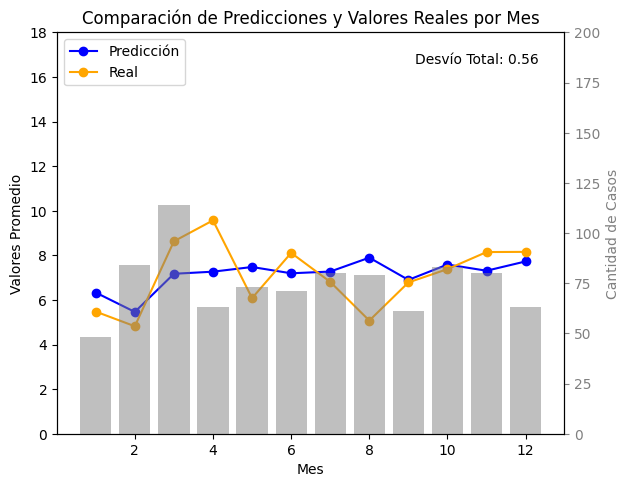

In [ ]:
# Supongamos que ya tienes el DataFrame X_test1 con las columnas 'Prediccion' y 'Real'
# y que 'Month of absence' es una columna que representa los meses en formato numérico

# Convertir la columna 'Month of absence' a formato de fecha
X_test2['Month of absence'] = pd.to_datetime(X_test2['Month of absence'], format='%m')

# Agregar una columna 'Mes' basada en la columna de fecha
X_test2['Mes'] = X_test2['Month of absence'].dt.month

# Crear un gráfico de líneas para la predicción y los valores reales
fig, ax1 = plt.subplots()

# Gráfico de líneas para la predicción y los valores reales en el primer eje y
ax1.plot(X_test2.groupby('Mes')['Prediccion'].mean(), label='Predicción', marker='o', color='blue')
ax1.plot(X_test2.groupby('Mes')['Real'].mean(), label='Real', marker='o', color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valores Promedio', color='black')
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0, 18)  # Establecer límites en el eje y1

# Segundo eje y para la cantidad de casos
ax2 = ax1.twinx()
ax2.bar(X_test2.groupby('Mes')['Mes'].count().index, X_test2.groupby('Mes')['Mes'].count(), label='Casos', alpha=0.5, color='gray')
ax2.set_ylabel('Cantidad de Casos', color='gray')
ax2.tick_params('y', colors='gray')
ax2.set_ylim(0, 200)  # Establecer límites en el eje y2

# Calcular el desvío total y mostrarlo en el gráfico
desvio_total = np.abs(X_test1['Prediccion'] - X_test1['Real']).mean()
plt.text(0.95, 0.95, f'Desvío Total: {desvio_total:.2f}', ha='right', va='top', transform=plt.gca().transAxes)

# Ajustar el diseño para evitar solapamientos
fig.tight_layout()

# Título del gráfico
plt.title('Comparación de Predicciones y Valores Reales por Mes')

# Mostrar el gráfico
plt.show()


Modelo LGBM

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suponiendo que X es tu matriz de características y y es tu variable objetivo
X = df_nuevo.drop(columns=['Absenteeism time in hours'])
y = df_nuevo['Absenteeism time in hours']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo LightGBM
model = lgb.LGBMRegressor()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calcula el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Genera el informe de evaluación
print("\nEvaluation Report:")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100
[LightGBM] [Info] Number of data points in the train set: 3594, number of used features: 7
[LightGBM] [Info] Start training from score 7.173623
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999

Evaluation Report:
Mean Squared Error: 69.03626594948783
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999


<big>Regresión con SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Suponiendo que X es tu matriz de características y y es tu variable objetivo
X = df_nuevo_1.drop(columns=['Absenteeism time in hours'])
y = df_nuevo_1['Absenteeism time in hours']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo SVM de regresión
model = SVR()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo (por ejemplo, MSE en el conjunto de prueba)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 149.25683820293105
Mean Absolute Error: 3.8305842093183444
R-squared: 0.4909177149149999


<big> Analisis de Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
X = df_nuevo_1.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

# Diccionarios vacíos para almacenar los resultados
sse, db, slc, cal = {}, {}, {}, {}

# Iterar sobre diferentes valores de k
for k in range(2, 10):
    # Semilla de 10 para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(X)  # Algoritmo K-means
    if k == 3:
        labels = kmeans.labels_
    clusters = kmeans.labels_  # Extracción de labels
    sse[k] = kmeans.inertia_  # Inercia: Suma de las distancias de las muestras a su centroide más cercano
    db[k] = davies_bouldin_score(X, clusters)  # Cálculo del índice de Davies-Bouldin
    slc[k] = silhouette_score(X, clusters)  # Cálculo del índice de Silhouette
    cal[k] = calinski_harabasz_score(X, clusters)  # Cálculo del índice de Calinski-Harabasz


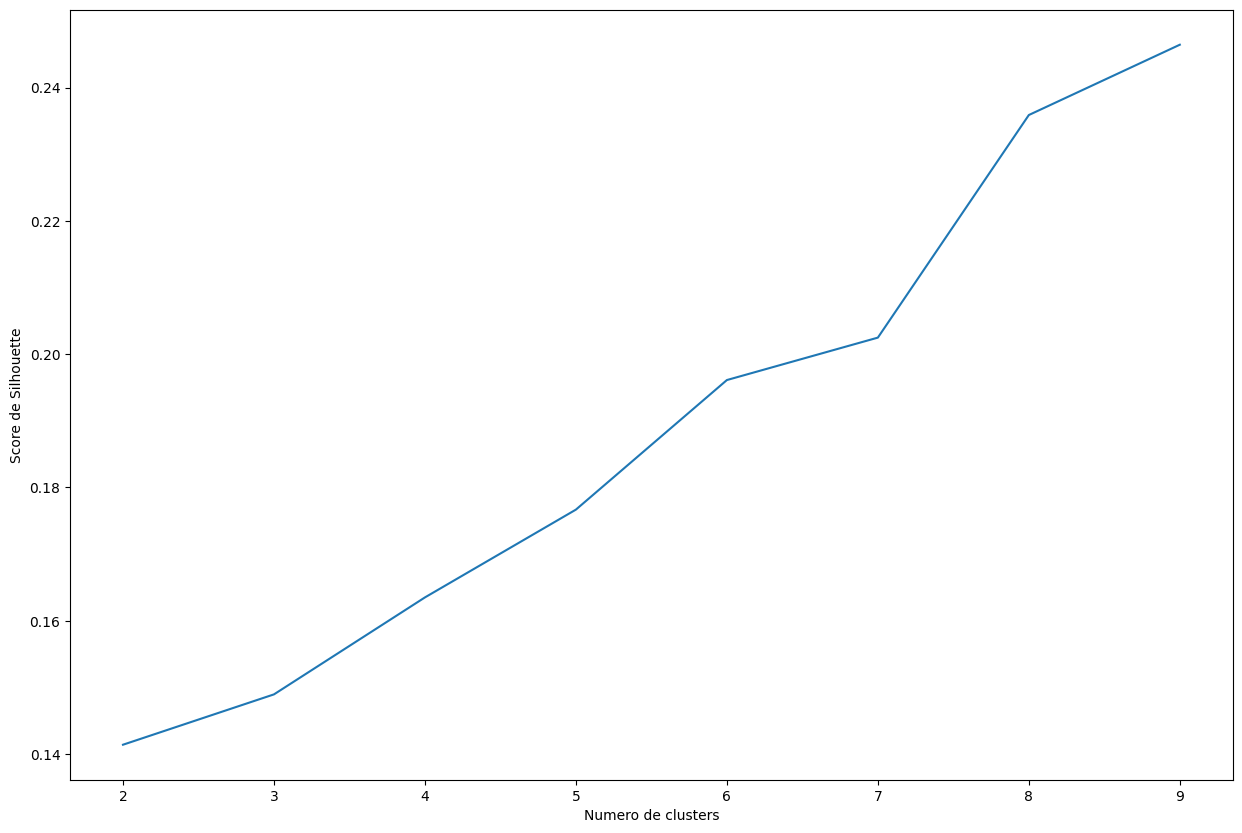

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Numero de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.14141563977200772
Para n_clusters = 3 El promedio del score de silhouette es:  0.14896727142132618
Para n_clusters = 4 El promedio del score de silhouette es:  0.16351359566615684
Para n_clusters = 5 El promedio del score de silhouette es:  0.17668288085848935
Para n_clusters = 6 El promedio del score de silhouette es:  0.1961185891331842
Para n_clusters = 7 El promedio del score de silhouette es:  0.20248267333502667
Para n_clusters = 8 El promedio del score de silhouette es:  0.2358729229973448
Para n_clusters = 9 El promedio del score de silhouette es:  0.246418376679038


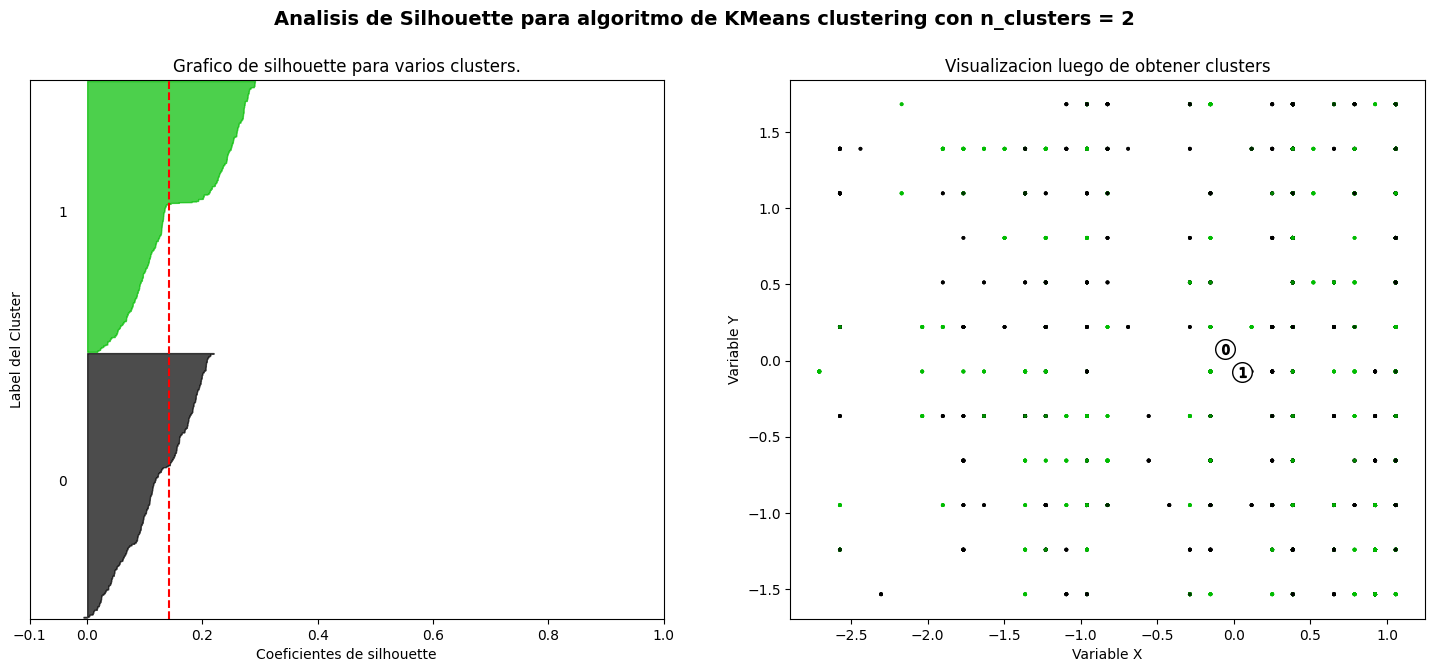

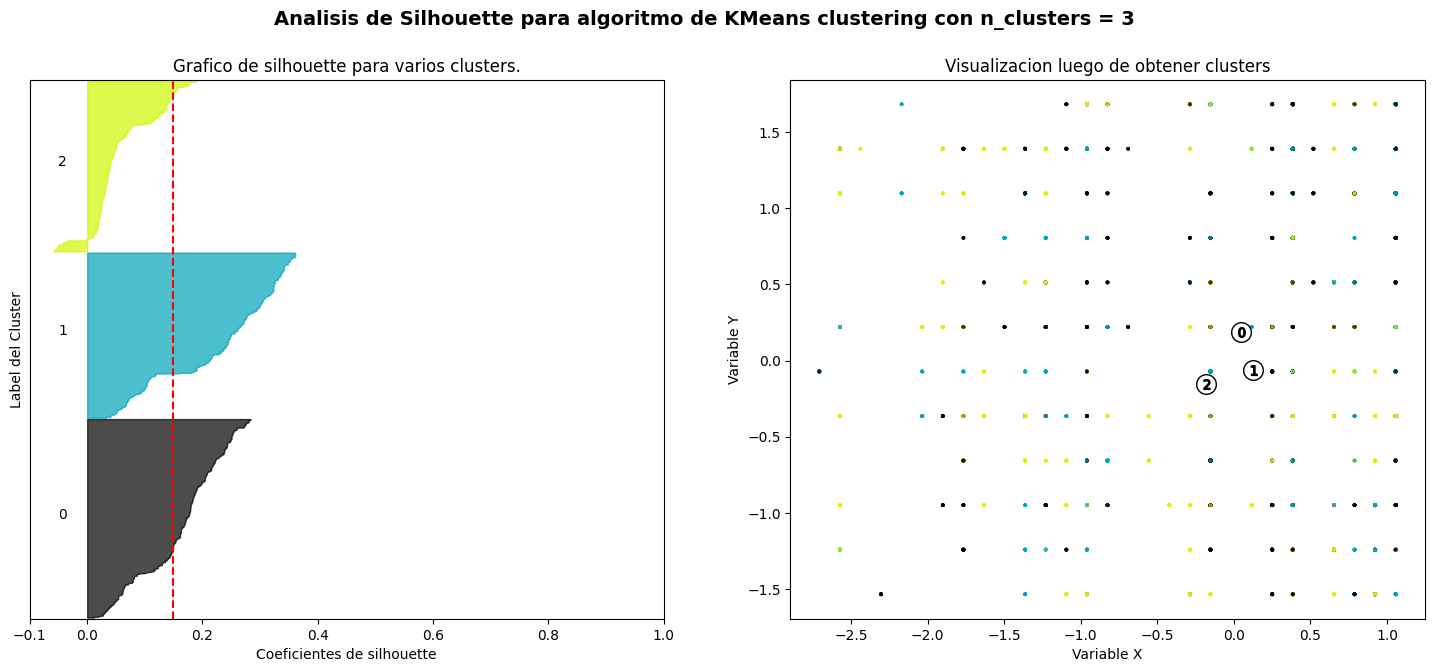

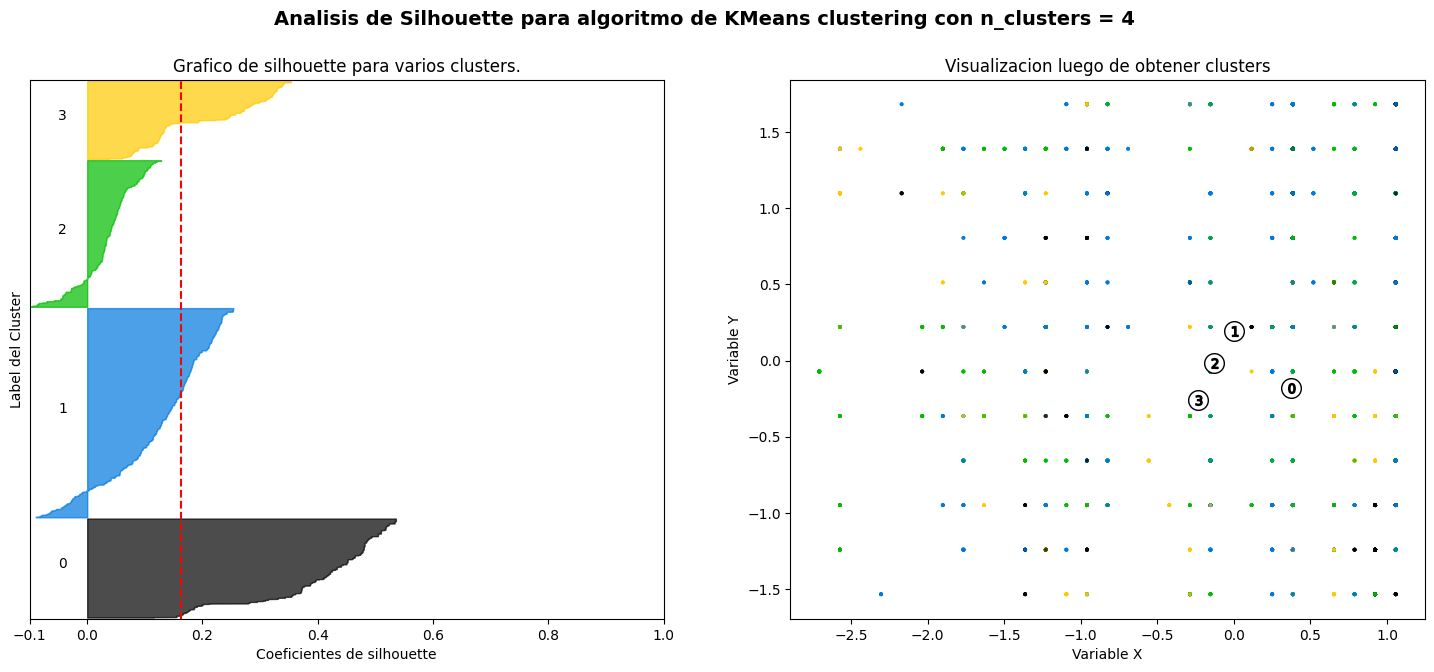

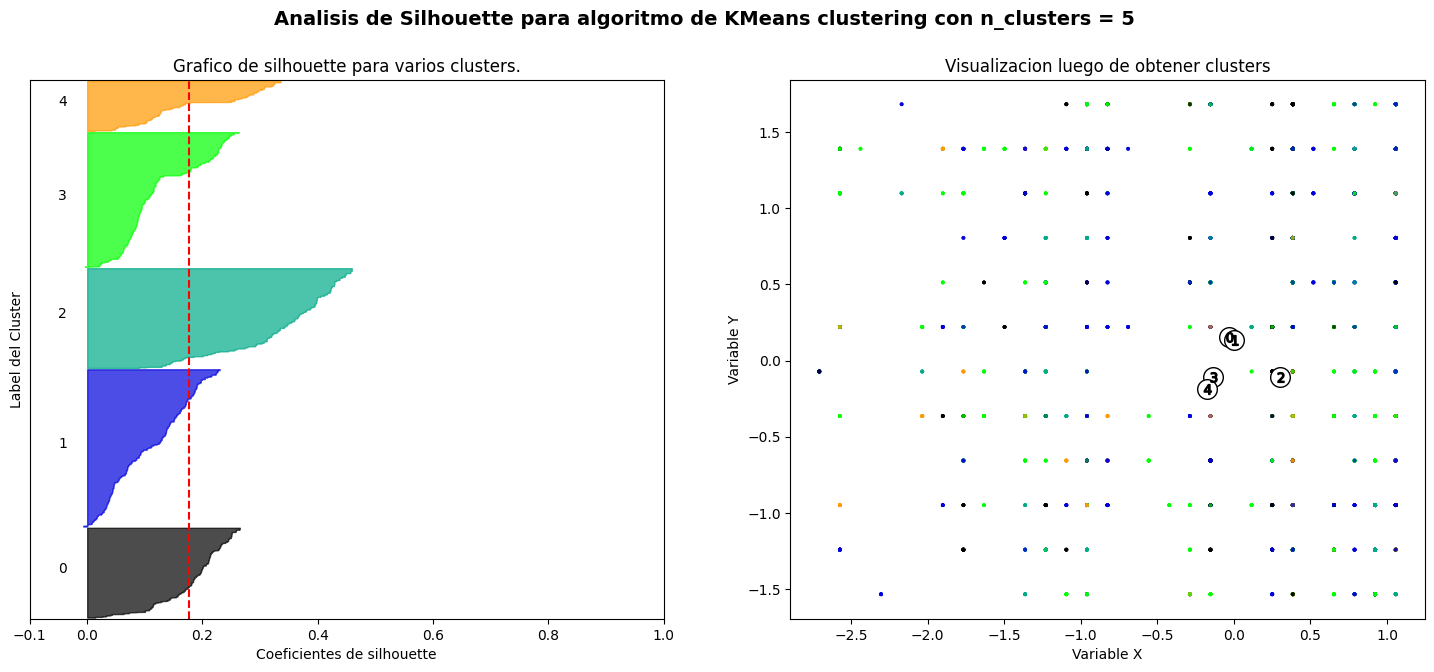

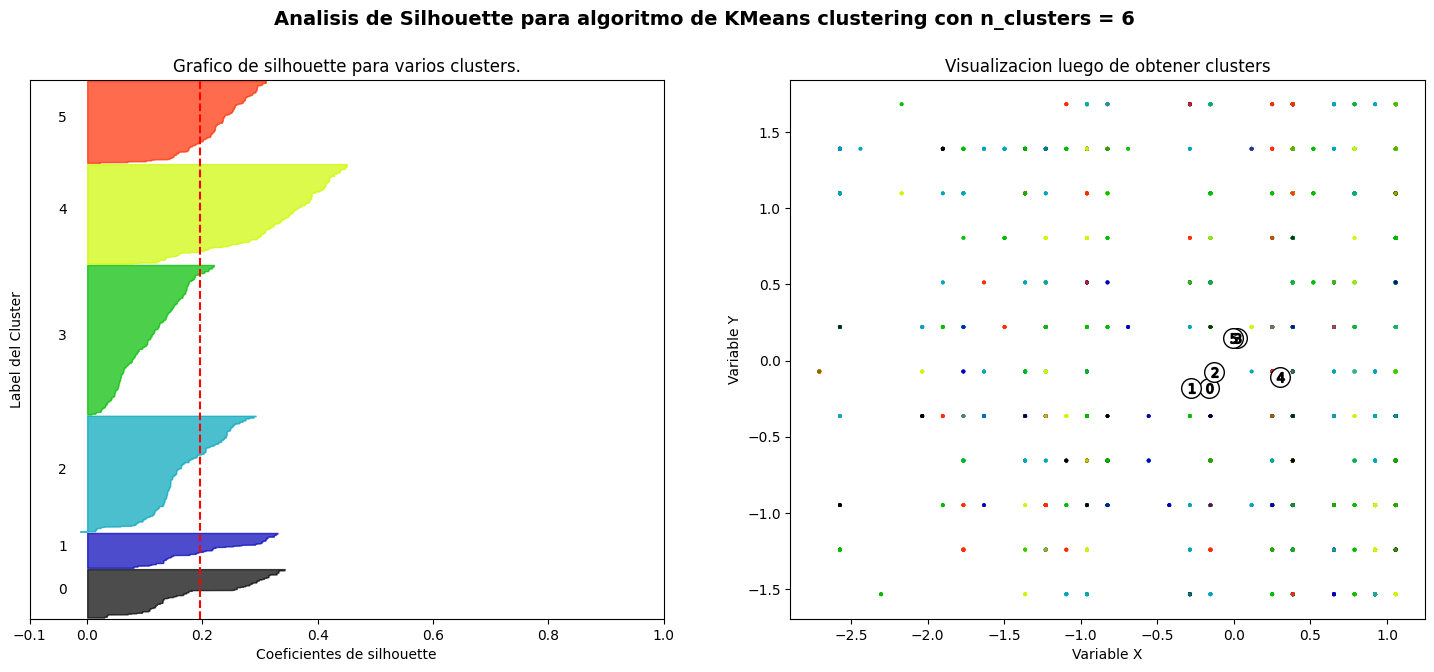

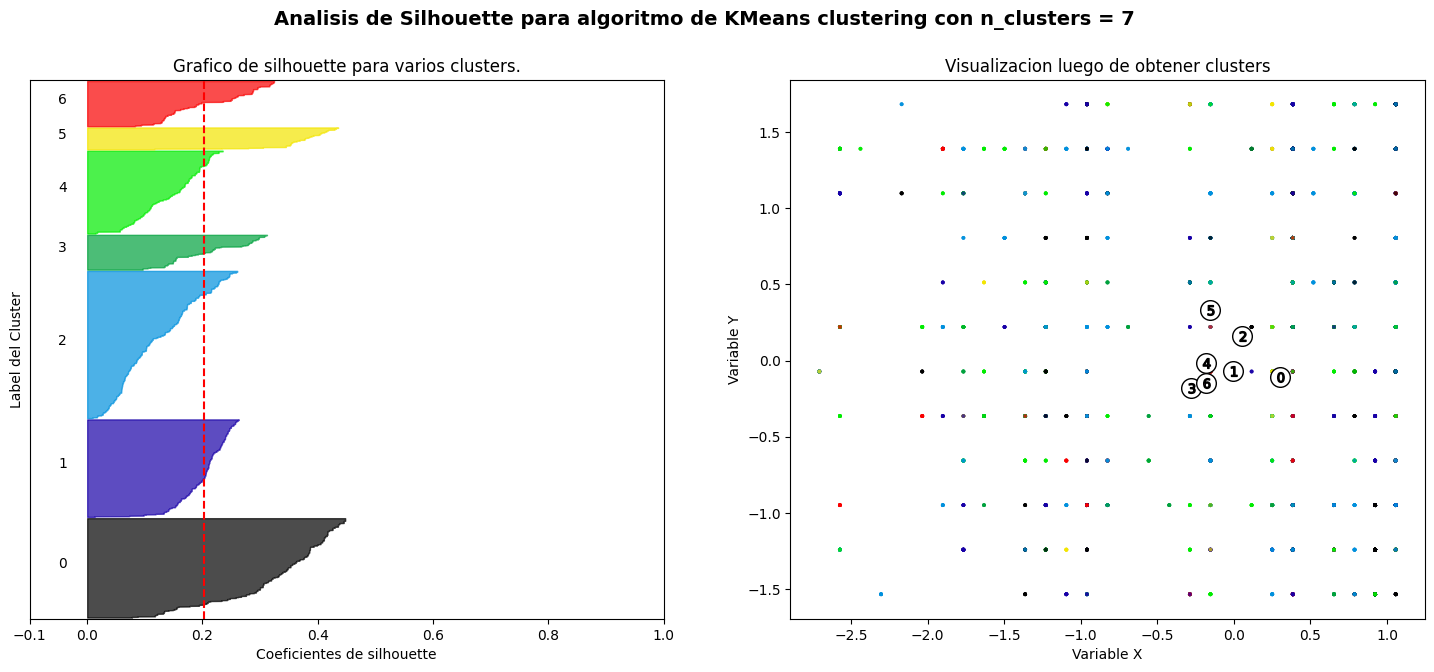

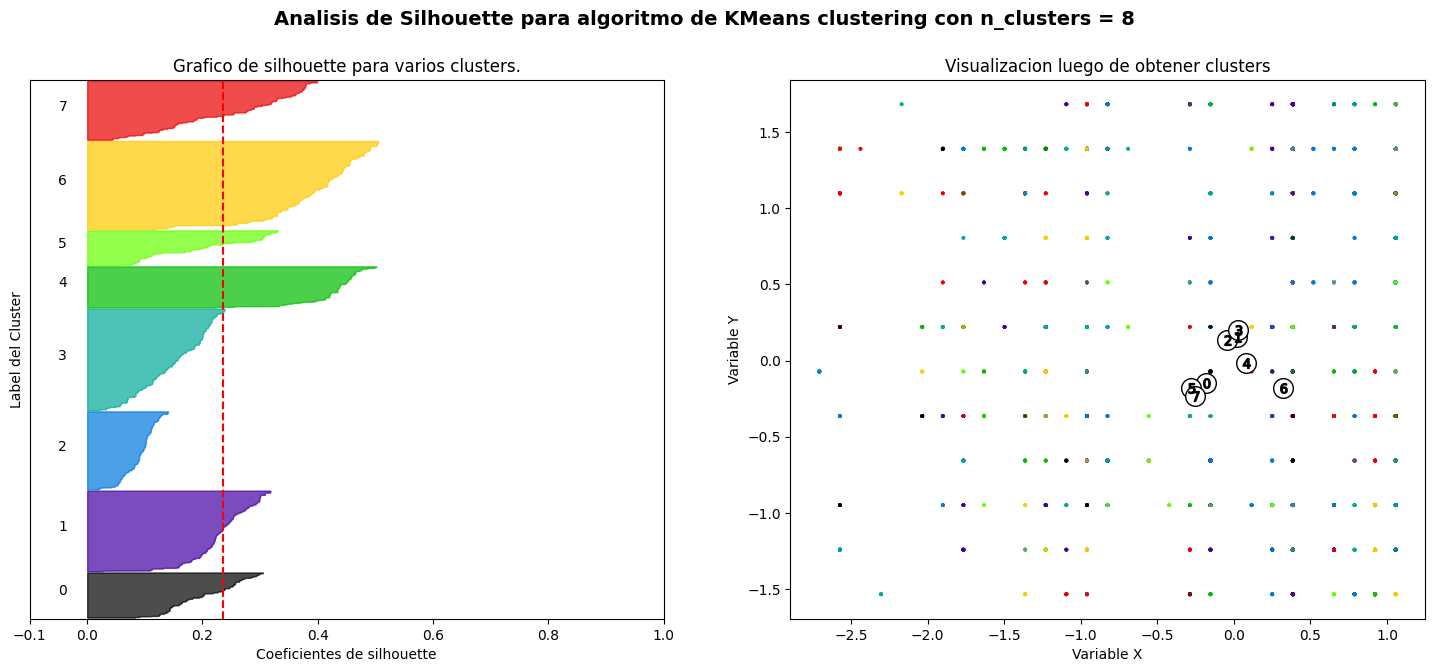

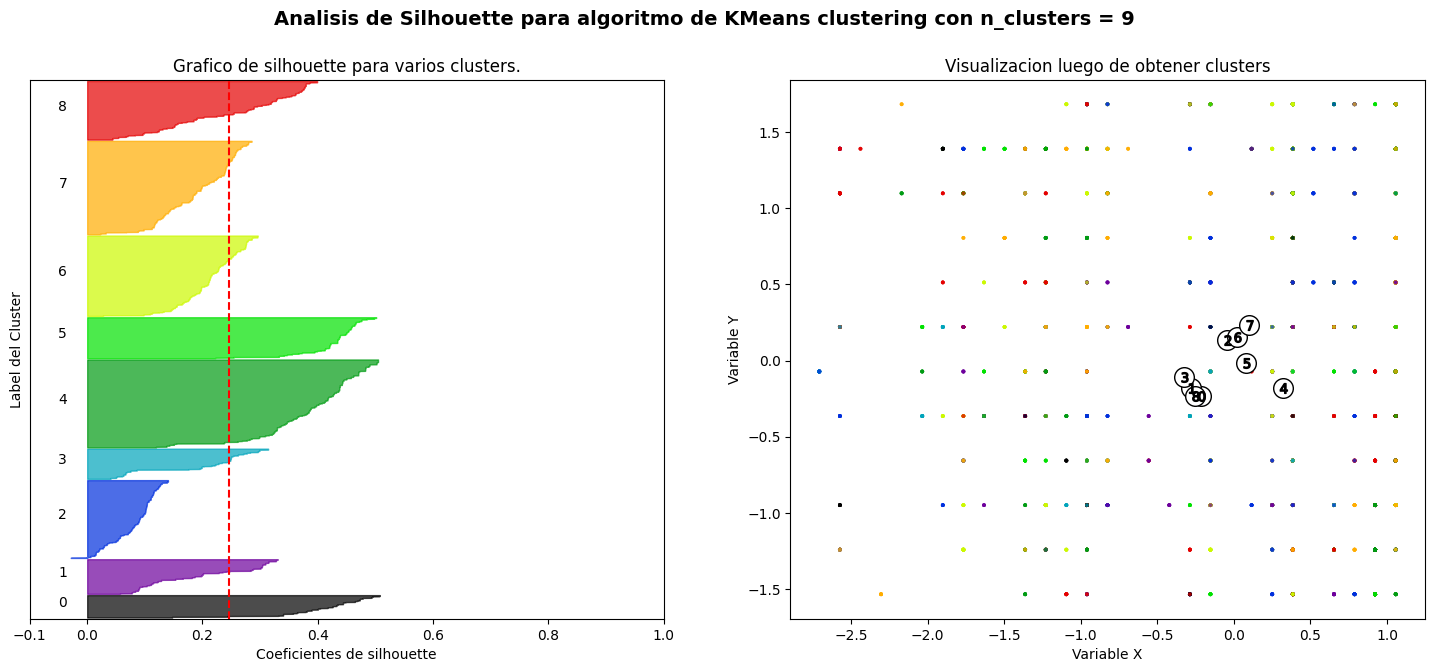

In [ ]:
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2, 10):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
    # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Splits con Cross Validation

In [ ]:
column_names = df_nuevo_1.columns
print(column_names)

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')


In [ ]:
from sklearn.ensemble import AdaBoostRegressor #Boosting
from sklearn.ensemble import RandomForestClassifier #Bagging
from sklearn.model_selection import KFold, cross_val_score

#df_nuevo_1

y_target=df_nuevo_1['Absenteeism time in hours']

# Instanciar el metodo con los kfold desados
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar el modelo a entrenar
model_ada = AdaBoostRegressor()
model_rf = RandomForestClassifier()

# Entrenar y evaluar el modelo AdaBoostRegressor
scores_ada = cross_val_score(model_ada, df_nuevo_1, y_target, cv=kfold)
print("Accuracy AdaBoostRegressor: %0.2f (+/- %0.2f)" % (scores_ada.mean(), scores_ada.std() * 2))

# Entrenar y evaluar el modelo RandomForestClassifier
scores_rf = cross_val_score(model_rf, df_nuevo_1, y_target, cv=kfold)
print("Accuracy RandomForestClassifier: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Accuracy AdaBoostRegressor: 0.99 (+/- 0.01)
Accuracy RandomForestClassifier: 1.00 (+/- 0.00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar el modelo RandomForestClassifier
model_rf = RandomForestClassifier()

# Entrenar el modelo con todo el DataFrame
model_rf.fit(df_nuevo_1, y_target)

# Obtener la importancia de las características
feature_importances = model_rf.feature_importances_

# Crear una lista de tuplas (nombre de la columna, importancia)
column_importance = list(zip(df_nuevo_1.columns, feature_importances))

# Ordenar la lista por importancia descendente
column_importance.sort(key=lambda x: round(x[1], 2), reverse=True)

# Imprimir las columnas y su importancia
for column, importance in column_importance:
    print(f"{column}: {importance:.2f}")

# Seleccionar las columnas que no son relevantes (por ejemplo, aquellas con importancia menor a un umbral)
umbral_importancia = 0.01
columnas_no_relevantes = [column for column, importance in column_importance if importance < umbral_importancia]

# Crear un nuevo DataFrame excluyendo las columnas no relevantes
df_nuevo_2 = df_nuevo_1.drop(columns=columnas_no_relevantes)

print(columnas_no_relevantes)
cantidad_columnas_no_relevantes = len(columnas_no_relevantes)
print("Cantidad de columnas no relevantes:", cantidad_columnas_no_relevantes)

# Probar el modelo con el nuevo DataFrame df_nuevo_2
#scores_rf_new = cross_val_score(model_rf, df_nuevo_2, y_target, cv=kfold)
#print("Accuracy RandomForestClassifier con columnas relevantes: %0.2f (+/- %0.2f)" % (scores_rf_new.mean(), scores_rf_new.std() * 2))

y_target=df_nuevo_2['Absenteeism time in hours']

# Instanciar el metodo con los kfold desados
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Instanciar el modelo a entrenar
model_ada = AdaBoostRegressor()
model_rf = RandomForestClassifier()

# Entrenar y evaluar el modelo AdaBoostRegressor
scores_ada = cross_val_score(model_ada, df_nuevo_2, y_target, cv=kfold)
print("Accuracy AdaBoostRegressor: %0.2f (+/- %0.2f)" % (scores_ada.mean(), scores_ada.std() * 2))

# Entrenar y evaluar el modelo RandomForestClassifier
scores_rf = cross_val_score(model_rf, df_nuevo_2, y_target, cv=kfold)
print("Accuracy RandomForestClassifier: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Absenteeism time in hours: 0.56
Reason for absence: 0.10
Work load Average/day : 0.06
Month of absence: 0.05
Day of the week: 0.04
Seasons: 0.03
Transportation expense: 0.03
Distance from Residence to Work: 0.02
Service time: 0.02
Age: 0.02
Weight: 0.02
Height: 0.02
Body mass index: 0.02
Social drinker: 0.01
Pet: 0.01
Education: 0.00
Son: 0.00
Social smoker: 0.00
['Social drinker', 'Pet', 'Education', 'Son', 'Social smoker']
Cantidad de columnas no relevantes: 5
Accuracy AdaBoostRegressor: 0.99 (+/- 0.01)
Accuracy RandomForestClassifier: 1.00 (+/- 0.00)


<big>Resultado
<big>

<small>

En primer lugar se habia realizado el analisis con los resultado con las muestras que teniamos. Las cuales llegamos a la conclusión que no eran suficientes. A fin de poder seguir usando el modelo, generamos 4000 muestras random.
Hemos tratado de ver si podiamos juntar caracteristicas por medio de K-means, pero no es posible.
Por otro lado, para poder predecir la inasistencia se esta usaron distintos tipos de algorimos para poder ver cual era mejor para lo que queriamos predecir.
Vimos que sacar los fixture al final terminaba dando peores resultados, asi que volvimos a empezar, colocando todas las columnas.
Luego de esto encontramos que Random Forest y el Regresion Lineal los resultados son muy parecidos.

Mean Squared Error: 8.174852230543102
Mean Absolute Error: 0.5820271082794833
R-squared: 0.9538899388410113



![image.png](attachment:image.png)